# This notebook will be mainly used for the capstone project

## Introduction

Because of the population increase, there are more and more car drivers appears making the road traffic become more complicated. This leads to increase the car incident rate. So, In this project, I would like to study the relationship among level of severity of car incidents  and factors such as weather,  number of vehicles involved in the collision, the drivers are drunk or not, and so on. after this project, we can know about when should we pay more attention when driving to decrease the car incident.

And my aimed target audiances are all different types of drivers around the world

## Data Understaning

The dataset is about the collision records during 2004 to present.
it has total 38 columns in the dataset but some of them may not useful for the prediction. Also, there is labeled data called SEVERITYCODE. Therefore, there are total 37 attributes and 1 labeled data. So we do not explain all of them in details. The under are the description of the data all we need in this project.
In addiction, some attributes have missing data and categorical types of data that we need to dealing with them in the data-preprocessing stage.


The labeled data:
SEVERITYCODE : corresponds to the severity of thecollision

• 3—fatality

• 2b—serious injury

• 2—injury

• 1—prop damage

• 0—unknown


Attributes:
OBJECTID: ObjectID ESRI unique identifier 

ADDRTYPE: Collision address type

SEVERITYDESC: A detailed description of the severity of the collision

COLLISIONTYPE: Collision type

INATTENTIONIND: Whether or not collision was due to inattention.(Y/N)

UNDERINFL:Whether or not a driver involved was under the influence of drugs or alcohol.

SPEEDING: Whether or not speeding was a factor in the collision.(Y/N)

WEATHER: A description of the weather conditions during the time of the collision.

ROADCOND: The condition of the road during the collision. 

and so on...

For futher attribute information, please go to the under link
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Hello Capstone Project Course!')


Hello Capstone Project Course!


## General Infomation of the data frame

In [233]:
df = pd.read_csv(r'C:\Users\user\Downloads\Data-Collisions.csv')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [235]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [236]:
df.shape

(194673, 38)

## Data Cleaning

### Drop the irrelevant features and unique IDs

In [237]:
# Drop the irrelevant features
# Drop the irrelevant unique IDs

df.drop(['OBJECTID','EXCEPTRSNDESC','EXCEPTRSNCODE','INTKEY','X','Y',
         'SDOTCOLNUM','INCDATE','INCDTTM','SEGLANEKEY','CROSSWALKKEY',
        'LOCATION','ST_COLDESC','SDOT_COLDESC','INCKEY','COLDETKEY','REPORTNO',
        'STATUS','SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT'],axis=1,inplace=True)
df.drop(['ADDRTYPE', 'SEVERITYDESC', 'COLLISIONTYPE'],axis=1,inplace=True)
df.drop(['PEDROWNOTGRNT'],axis = 1, inplace=True)


### Drop the Unknown index

In [238]:
# df[df['COL_NAME'] == 'XXXXX'].index => get the index from the column by specific values
# df_actual = df_actual[df_actual.ROADCOND != 'Unknown']

df.drop(index=(df[df['LIGHTCOND'] == 'Unknown'].index), axis = 0, inplace = True)
df.drop(index=(df[df['JUNCTIONTYPE'] == 'Unknown'].index), axis = 0, inplace = True)
df.drop(index=(df[df['WEATHER'] == 'Unknown'].index), axis = 0,inplace = True)
df.drop(index=(df[df['ROADCOND'] == 'Unknown'].index), axis = 0, inplace = True)


### Dealing with the null values

In [239]:
Features = df.columns
num_of_null_by_cols = df.isnull().sum().sort_values(ascending=False)
percentage_of_null_by_cols = (df.isnull().sum() / len(df)).sort_values(ascending=False)
null_df = pd.DataFrame({'Number of Null': num_of_null_by_cols,
                                'Percentage of Null':percentage_of_null_by_cols})
null_df.index.name = 'Features'
null_df

,Number of Null,Percentage of Null
Features,,
SPEEDING,166608,0.947913
INATTENTIONIND,147081,0.836814
LIGHTCOND,5119,0.029124
WEATHER,5065,0.028817
ROADCOND,4993,0.028408
UNDERINFL,4882,0.027776
JUNCTIONTYPE,2676,0.015225
ST_COLCODE,16,0.000091
HITPARKEDCAR,0,0.000000


In [240]:
#df['PEDROWNOTGRNT'].fillna('N',inplace = True)
df['SPEEDING'].fillna('N',inplace = True)
df['INATTENTIONIND'].fillna('N',inplace = True)

In [241]:
# drop the particular missing item

#df.drop(df[df['COLLISIONTYPE'].isnull()].index,inplace = True)
#df.drop(df[df['ADDRTYPE'].isnull()].index,inplace = True)

df.drop(df[df['JUNCTIONTYPE'].isnull()].index,inplace = True)
df.drop(df[df['WEATHER'].isnull()].index,inplace = True)
df.drop(df[df['ROADCOND'].isnull()].index,inplace = True)
df.drop(df[df['UNDERINFL'].isnull()].index,inplace = True)
df.drop(df[df['ST_COLCODE'].isnull()].index,inplace = True)
df.drop(df[df['LIGHTCOND'].isnull()].index,inplace = True)


In [242]:
df.isnull().sum().sort_values(ascending=False)[0:5]

HITPARKEDCAR    0
ST_COLCODE      0
SPEEDING        0
LIGHTCOND       0
ROADCOND        0
dtype: int64

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167981 entries, 0 to 194672
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SEVERITYCODE    167981 non-null  int64 
 1   VEHCOUNT        167981 non-null  int64 
 2   JUNCTIONTYPE    167981 non-null  object
 3   SDOT_COLCODE    167981 non-null  int64 
 4   INATTENTIONIND  167981 non-null  object
 5   UNDERINFL       167981 non-null  object
 6   WEATHER         167981 non-null  object
 7   ROADCOND        167981 non-null  object
 8   LIGHTCOND       167981 non-null  object
 9   SPEEDING        167981 non-null  object
 10  ST_COLCODE      167981 non-null  object
 11  HITPARKEDCAR    167981 non-null  object
dtypes: int64(3), object(9)
memory usage: 16.7+ MB


### Feature Engineering

In [244]:
print(df['INATTENTIONIND'].unique())
print(df['SPEEDING'].unique())
#print(df['HITPARKEDCAR'].unique())
#print(df['PEDROWNOTGRNT'].unique())


['N' 'Y']
['N' 'Y']


In [245]:
df['UNDERINFL'].unique()

array(['N', '0', '1', 'Y'], dtype=object)

In [246]:
# UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol. 
# Since some of the rows in UNDERINFL has 'Y','N','0','1', 
# therefore I change the 'Y' and 'N' categories in UNDERINFL to '1' and '0'

def encoding_underinfl(x):
    if x == 'N' or x == '0': # The original data type values in UNDERINFL are string for '1' and '0'
        return 0
    if x == 'Y' or x == '1':
        return 1

df['UNDERINFL'] = df.UNDERINFL.apply(encoding_underinfl)


In [247]:
df['UNDERINFL'].unique()

array([0, 1], dtype=int64)

In [248]:
df['INATTENTIONIND'].unique()

array(['N', 'Y'], dtype=object)

In [249]:
# For 'yes' or 'no' categories.
def encoding_YESNO(x):
    if x == 'N':
        return 0
    if x == 'Y':
        return 1
df['INATTENTIONIND'] = df.INATTENTIONIND.apply(encoding_YESNO)
df['SPEEDING'] = df.SPEEDING.apply(encoding_YESNO)
df['HITPARKEDCAR'] = df.HITPARKEDCAR.apply(encoding_YESNO)
#df['PEDROWNOTGRNT'] = df.PEDROWNOTGRNT.apply(encoding_YESNO)


In [250]:
df.head()

,SEVERITYCODE,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,2,At Intersection (intersection related),11,0,0,Overcast,Wet,Daylight,0,10,0
1,1,2,Mid-Block (not related to intersection),16,0,0,Raining,Wet,Dark - Street Lights On,0,11,0
2,1,3,Mid-Block (not related to intersection),14,0,0,Overcast,Dry,Daylight,0,32,0
3,1,3,Mid-Block (not related to intersection),11,0,0,Clear,Dry,Daylight,0,23,0
4,2,2,At Intersection (intersection related),11,0,0,Raining,Wet,Daylight,0,10,0


## Data Processing of SEVERITYCODE(target variable)

In [251]:
df['SEVERITYCODE'].describe()

count    167981.000000
mean          1.330412
std           0.470363
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: SEVERITYCODE, dtype: float64

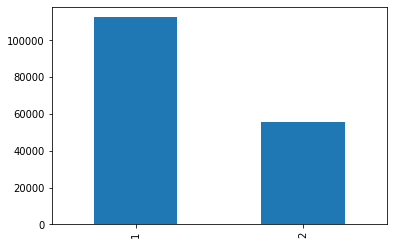

In [252]:
cnt_severitycode = df['SEVERITYCODE'].value_counts()
cnt_severitycode.plot(kind='bar')

## Exploratory Data Analysis

### Relationship between speeding and serverity

SPEEDING  SEVERITYCODE
0         1               106890
          2                52050
1         1                 5588
          2                 3453
Name: SEVERITYCODE, dtype: int64

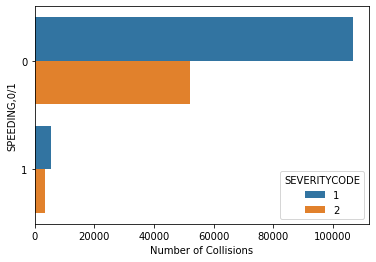

In [253]:
ax = sns.countplot(y="SPEEDING", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="SPEEDING,0/1")
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts()

### Relationship between junction yype and severity

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1                1197
                                                   2                 601
At Intersection (intersection related)             1               33276
                                                   2               26233
Driveway Junction                                  1                6848
                                                   2                3133
Mid-Block (but intersection related)               1               14229
                                                   2                6986
Mid-Block (not related to intersection)            1               56823
                                                   2               18498
Ramp Junction                                      1                 105
                                                   2                  52
Name: SEVERITYCODE, dtype: int64

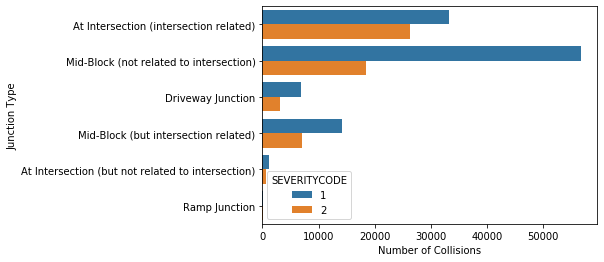

In [254]:
ax = sns.countplot(y="JUNCTIONTYPE", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="Junction Type")
df.groupby(['JUNCTIONTYPE'])['SEVERITYCODE'].value_counts()

### Relationship between weather and severity

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  30
                          2                  13
Clear                     1               71897
                          2               35414
Fog/Smog/Smoke            1                 361
                          2                 183
Other                     1                 172
                          2                  78
Overcast                  1               17981
                          2                8585
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21280
                          2               11029
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  83
                          2                  27
Snowing                   1                 654
                          2                 164
N

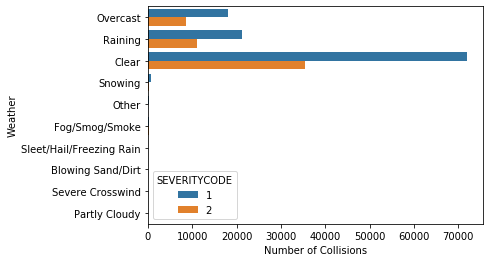

In [255]:
ax = sns.countplot(y="WEATHER", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="Weather")
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts()

### Relationship between road conditions and serverity

ROADCOND        SEVERITYCODE
Dry             1               80410
                2               39483
Ice             1                 818
                2                 262
Oil             1                  34
                2                  24
Other           1                  63
                2                  42
Sand/Mud/Dirt   1                  40
                2                  21
Snow/Slush      1                 680
                2                 156
Standing Water  1                  75
                2                  30
Wet             1               30358
                2               15485
Name: SEVERITYCODE, dtype: int64

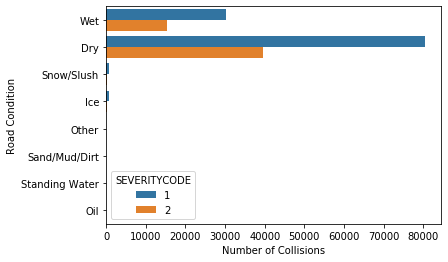

In [256]:
ax = sns.countplot(y="ROADCOND", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="Road Condition")
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts()

### Relationship between light condition and severity

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1038
                          2                 319
Dark - Street Lights Off  1                 783
                          2                 307
Dark - Street Lights On   1               31935
                          2               14207
Dark - Unknown Lighting   1                   5
                          2                   4
Dawn                      1                1577
                          2                 805
Daylight                  1               73321
                          2               37921
Dusk                      1                3683
                          2                1891
Other                     1                 136
                          2                  49
Name: SEVERITYCODE, dtype: int64


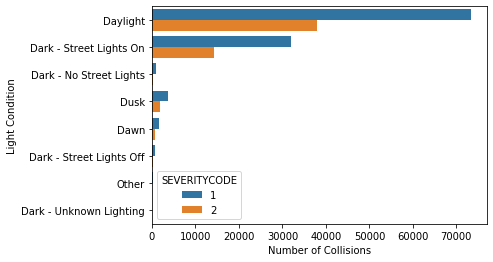

In [257]:
ax = sns.countplot(y="LIGHTCOND", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="Light Condition")
print(df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts())

### Relationship between ST_COLCODE and SEVERITYCODE

ST_COLCODE  SEVERITYCODE
0           2               774
            1                75
1           2               325
            1                35
2           2               571
                           ... 
84          2                20
85          1                 1
87          2                 1
88          1                 5
            2                 3
Name: SEVERITYCODE, Length: 216, dtype: int64

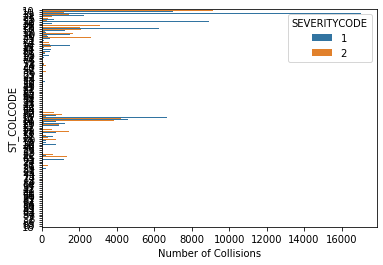

In [258]:
ax = sns.countplot(y="ST_COLCODE", hue="SEVERITYCODE", data=df)
ax.set(xlabel='Number of Collisions', ylabel="ST_COLCODE")
df.groupby(['ST_COLCODE'])['SEVERITYCODE'].value_counts()


 ### Relationship between ADDRTYPE and severity

In [259]:
#ax = sns.countplot(y="ADDRTYPE", hue="SEVERITYCODE", data=df)
#ax.set(xlabel='Number of Collisions', ylabel="ADDRTYPE")
#df.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts()


 ### Relationship between collision type and severity

In [260]:
#ax = sns.countplot(y="COLLISIONTYPE", hue="SEVERITYCODE", data=df)
#ax.set(xlabel='Number of Collisions', ylabel="COLLISIONTYPE")
#df.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts()


### Relationship between light conditions and serverity

## Balancing the dataset

In [261]:
#df.drop(["INCDTTM"],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['ST_COLCODE'])], axis=1)
df.drop(["ST_COLCODE"],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['JUNCTIONTYPE'])], axis=1)
df.drop(["JUNCTIONTYPE"],axis=1, inplace=True)

df["WEATHER"].replace(np.NaN, "Clear", inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Unknown", "Unknown Weather", inplace=True)
df["WEATHER"].replace("Partly Cloudy", "Overcast", inplace=True)

#WEATHER is also one-hot encoded and its header is removed
df = pd.concat([df,pd.get_dummies(df['WEATHER'])], axis=1)
df.drop(["WEATHER"],axis=1, inplace=True)

df["ROADCOND"].replace(np.NaN, "Dry", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Unknown", "Unknown Roadcond", inplace=True)

#ROADCOND is one-hot encoded for use in the ML Model with its header removed.
df = pd.concat([df,pd.get_dummies(df['ROADCOND'])], axis=1)
df.drop(["ROADCOND"],axis=1, inplace=True)
df = pd.concat([df,pd.get_dummies(df['LIGHTCOND'])], axis=1)
df.drop(['LIGHTCOND'],axis=1, inplace=True)

In [262]:
df.columns.values

array(['SEVERITYCODE', 'VEHCOUNT', 'SDOT_COLCODE', 'INATTENTIONIND',
       'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 0, 1, 2, 3, 4, 10, 11, 12,
       13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 40, 41, 42, 43, 45, 48, 50, 51, 52, 53, 54, 56, 57, 64, 65, 66,
       67, 71, 72, 73, 74, 81, 82, 83, 84, 87, ' ', '0', '1', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '4', '40', '41', '42', '43', '45', '48', '49', '5', '50',
       '51', '52', '53', '54', '56', '57', '6', '60', '64', '65', '66',
       '67', '7', '71', '72', '73', '74', '8', '81', '82', '83', '84',
       '85', '87', '88',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
     

In [221]:
from imblearn.under_sampling import RandomUnderSampler
import imblearn

x = df[['VEHCOUNT', 'SDOT_COLCODE', 'INATTENTIONIND',
       'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR', 0, 1, 2, 3, 4, 10, 11, 12,
       13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 40, 41, 42, 43, 45, 48, 50, 51, 52, 53, 54, 56, 57, 64, 65, 66,
       67, 71, 72, 73, 74, 81, 82, 83, 84, 87, ' ', '0', '1', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '4', '40', '41', '42', '43', '45', '48', '49', '5', '50',
       '51', '52', '53', '54', '56', '57', '6', '60', '64', '65', '66',
       '67', '7', '71', '72', '73', '74', '8', '81', '82', '83', '84',
       '85', '87', '88',
       'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Ramp Junction',
       'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast',
       'Raining', 'Severe Crosswind', 'Sleet/Hail/Freezing Rain',
       'Snowing', 'Unknown Weather', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt',
       'Snow/Slush', 'Standing Water', 'Unknown Roadcond', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other']]

y = df['SEVERITYCODE']


#Use random under sampling (RUS) method such that the resulting numbers of each severity class are equal.
#RUS randomly removes samples from the majority class (in this case SEVERITYCODE = 1) such that the number present
#equal that of the minority class SEVERITYCODE = 2 such that they are now equal.
RUS = RandomUnderSampler(random_state=12)
x_resampled, y_resampled = RUS.fit_resample(x, y)

#printing off the new value counts.
print(y_resampled.value_counts())
print(x_resampled[0:5])

2    55503
1    55503
Name: SEVERITYCODE, dtype: int64
   VEHCOUNT  SDOT_COLCODE  INATTENTIONIND  UNDERINFL  SPEEDING  HITPARKEDCAR  \
0         2            11               0          0         0             0   
1         2            11               0          0         0             0   
2         2            11               0          0         0             0   
3         1            26               0          0         0             0   
4         2            11               0          0         0             0   

   0  1  2  3  ...  Unknown Roadcond  Wet  Dark - No Street Lights  \
0  0  0  0  0  ...                 0    0                        0   
1  0  0  0  0  ...                 0    1                        0   
2  0  0  0  0  ...                 0    0                        0   
3  0  0  0  0  ...                 0    1                        0   
4  0  0  0  0  ...                 0    0                        0   

   Dark - Street Lights Off  Dark - Street 

## Modeling

In [222]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_prp = preprocessing.StandardScaler().fit(x_resampled).transform(x_resampled)
x_prp[0:2]

array([[ 0.07326911, -0.55330685, -0.45624864, -0.24216063, -0.24332581,
        -0.14773415, -0.08616076, -0.05583574, -0.07322321, -0.0268552 ,
        -0.01273498, -0.27031692, -0.14219519, -0.06436611, -0.11962111,
        -0.24130477, -0.07548941, -0.07158879, -0.0381114 , -0.06658639,
        -0.07190593, -0.08286299, -0.08637273, -0.03799268, -0.0143958 ,
        -0.04063597, -0.01991311, -0.14789324, -0.02143935, -0.04901044,
        -0.00671153, -0.23151177, -0.01308401, -0.01082241, -0.00424469,
         0.        , -0.11468221, -0.00671153, -0.1548064 , -0.02325519,
        -0.0491027 , -0.00735215,  0.        , -0.00600295, -0.01530609,
        -0.01342397, -0.00519868, -0.00600295, -0.00424469, -0.04237824,
        -0.01082241, -0.01850516, -0.03149477, -0.0355357 , -0.00519868,
        -0.01200655, -0.01500879, -0.00300143, -0.00300143, -0.12641294,
        -0.08141795,  2.4372205 , -0.20918973, -0.08308314, -0.18218292,
        -0.33975933, -0.10554695, -0.10086622, -0.0

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (134384, 152) (134384,)
Test set: (33597, 152) (33597,)


### Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.05).fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [225]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.21455623, 0.78544377],
       [0.55680775, 0.44319225],
       [0.5452639 , 0.4547361 ],
       ...,
       [0.63097897, 0.36902103],
       [0.52227136, 0.47772864],
       [0.86935019, 0.13064981]])

In [226]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

jaccard_score_LR = jaccard_score(y_test, yhat)
f1_score_LR = f1_score(y_test, yhat, average='weighted')

print('The jaccard score is: ',jaccard_score_LR)
print('The F-1 score is: ',f1_score_LR)

The jaccard score is:  0.7034376435084957
The F-1 score is:  0.6878933101422043


### Decision Tree

In [227]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_DT.shape,  y_train_DT.shape)
print ('Test set:', X_test_DT.shape,  y_test_DT.shape)

Train set: (134384, 152) (134384,)
Test set: (33597, 152) (33597,)


In [228]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [229]:
drugTree.fit(X_train_DT,y_train_DT)

predTree_DT = drugTree.predict(X_test_DT) #prediction


In [230]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_DT, predTree_DT))
jaccard_score_DT = jaccard_score(y_test_DT,predTree_DT)
f1_score_DT = f1_score(y_test_DT, predTree_DT, average = 'weighted')
print('The jaccard score is: ',jaccard_score_DT)
print('The F-1 score is: ',f1_score_DT)

DecisionTrees's Accuracy:  0.7314045896955085
The jaccard score is:  0.7024531785808494
The F-1 score is:  0.691554267748142


### K-Nearest Neighbour(KNN)

In [45]:
# finding a good K for the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

#We create Ks-15 classifiers, and test the accuracy of each classifer for each value of n neighbours.
#We print the mean accuracy for all classifiers and save the one with the best accuracy.
numTestsPerformed = 0
for n in range(15,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    #Creating and testing numerous classifiers takes time, a loading bar is therefore created and displayed
    numTestsPerformed = numTestsPerformed + 1
    print("Loading: " + str(round(((numTestsPerformed / 10) * 100), 2)) + "%", end="\r")
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.72265253,
       0.72575071, 0.72259295, 0.72417183, 0.72125238, 0.72560176,
       0.72098427, 0.72512512, 0.72321854, 0.72634652])

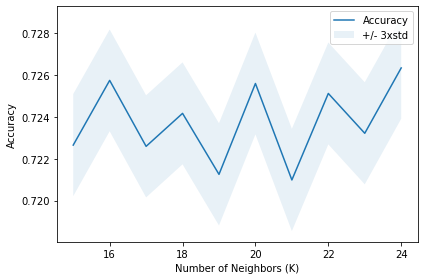

The best general accuracy was at 0.7263465204957102 with k= 24


In [46]:
# Visualize k-value over accuracy
plt.plot(range(15,Ks),mean_acc[14:25])
plt.fill_between(range(15,Ks),mean_acc[14:25] - 1 * std_acc[14:25],mean_acc[14:25] + 1 * std_acc[14:25], alpha=0.10)

#Plotting line graph displaying the accuracy of the classifier with each value K = n neighbours.
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#Print classifier with the best accuracy.
print( "The best general accuracy was at", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [48]:
# build final KNN model
k = 24
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat = KNN.predict(X_test)

# full evalution
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#Printing off evaluation metrics for K-NN classifier
acc1 = metrics.accuracy_score(y_test, y_hat)
jc1 = jaccard_score(y_test, y_hat)
fs1 = f1_score(y_test, y_hat, average='weighted')
print("Accuracy Score: ", acc1)
print("Jaccard Score: ", jc1)
print("F1 Score: ", fs1)

Accuracy Score:  0.7232185414680649
Jaccard Score:  0.6848799348799349
F1 Score:  0.6992675464903947


In [263]:
MLlist = ['KNN','DT','LR']
jaccard = [jc1,
          jaccard_score_DT,
          jaccard_score_LR]

f_1 = [fs1, f1_score_DT, f1_score_LR]

In [264]:
df_result = pd.DataFrame({'Model': MLlist, 'Jaccard' : jaccard,'f1_Score':f_1})

In [265]:
df_result

,Model,Jaccard,f1_Score
0,KNN,0.684880,0.699268
1,DT,0.702453,0.691554
2,LR,0.703438,0.687893
